In [24]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import data_loader
import config
import audio_processing
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use("dark_background")

In [3]:
conf = config.get_config()
f = "bright_vs_dark"
conf.update({
    "features": [f],
    "valid_split": 0.0
})

examples = data_loader.data_loader(conf)

2021-05-14 10:24:08.021 | INFO     | data_loader:data_loader:30 - Loading csv and checking audio files
2021-05-14 10:24:08.035 | INFO     | data_loader:data_loader:33 - Creating dataset


In [5]:
multiple_annots = {}

for _, value in examples.items():
    file_name = value["audio_file_name"]
    feature_val = value[f]

    if file_name not in multiple_annots:
        multiple_annots[file_name] = [feature_val]
    else:
        multiple_annots[file_name].append(feature_val)

In [7]:
only_multiple = {}

for key, value in multiple_annots.items():
    if len(value) > 1:
        only_multiple[key] = value

In [51]:
stats = {
    "mean": [],
    "std": [],
    "count": [],
    "count_class": []
}

for _, value in only_multiple.items():
    stats["mean"].append(np.mean(value))
    stats["std"].append(np.std(value))
    stats["count"].append(len(value))
    stats["count_class"].append(int(len(value) >= 4))

In [52]:
df = pd.DataFrame(stats)

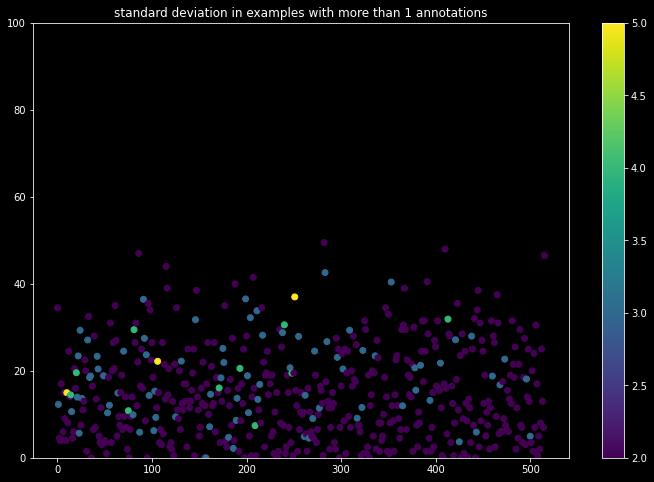

In [53]:
plt.figure(figsize=(12, 8))
plt.scatter(range(len(df)), df.loc[:, "std"],
            c=df.loc[:, "count"])
plt.ylim([0., 100.])
plt.colorbar()
plt.title("standard deviation in examples with more than 1 annotations")
plt.savefig("standard_deviation.png")

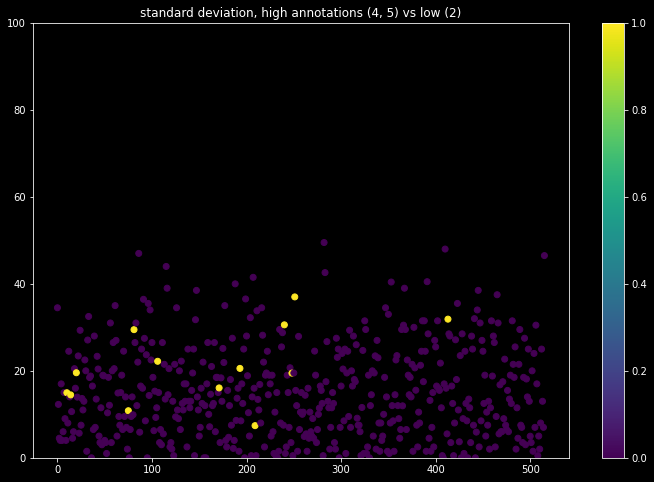

In [54]:
plt.figure(figsize=(12, 8))
plt.scatter(range(len(df)), df.loc[:, "std"],
            c=df.loc[:, "count_class"])
plt.ylim([0., 100.])
plt.colorbar()
plt.title("standard deviation, high annotations (4, 5) vs low (2)")
plt.savefig("standard_deviation_45.png")

KeyError: False